<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/mySolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# My Solutions

## Loading Packages

In [ ]:


from google.colab import auth
auth.authenticate_user()
print('Authenticated')



KeyboardInterrupt: ignored

In [ ]:
import pandas as pa
import requests
from bs4 import BeautifulSoup
import re

## SQL Subquery

In [ ]:
%%bigquery --project pic-math
WITH t as (
SELECT COUNT(*) as number_trips, start_station_name
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`
GROUP BY start_station_name
ORDER BY number_trips DESC
LIMIT 2
)

SELECT *
FROM t
ORDER BY number_trips
LIMIT 1

,number_trips,start_station_name
0,40635,Riverside @ S. Lamar


In [ ]:
%%bigquery --project pic-math

SELECT COUNT(*) as round_trips, start_station_name
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips`
WHERE start_station_name = end_station_name AND duration_minutes >= 60
GROUP BY start_station_name

,round_trips,start_station_name
0,190,Toomey Rd @ South Lamar
1,119,Waller & 6th St.
2,249,State Capitol @ 14th & Colorado
3,83,Rainey @ River St
4,80,Nueces @ 3rd
...,...,...
173,317,Republic Square @ Guadalupe & 4th St.
174,378,3rd & West
175,169,3rd/West
176,71,26th/Nueces


## SQL JOINS

In [ ]:


%%bigquery --project pic-math
WITH stations as (
SELECT name, property_type
FROM `bigquery-public-data.austin_bikeshare.bikeshare_stations`
)

SELECT stations.property_type as starting_station_type, 
       AVG(trips.duration_minutes) as average_ride_minutes, 
       count(*) as number_of_trips, 
       STDDEV_POP(trips.duration_minutes) as std_ride_minutes
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips` as trips 
    LEFT OUTER JOIN stations 
      ON trips.start_station_name = stations.name
WHERE stations.property_type = 'sidewalk' OR stations.property_type = 'parkland'
GROUP BY stations.property_type
ORDER BY average_ride_minutes DESC





##html Tables

In [ ]:
html = requests.get('https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_films')
soup = BeautifulSoup(html.text)

df3 = pa.read_html(str(soup.find_all('table', class_='wikitable plainrowheaders')[0]))[0]

df3.columns = df3.columns.droplevel(1)

In [ ]:
head = list(df3.columns[:-1])
head.append('Phase')
df3.columns = head

In [ ]:
df3.Phase = [1,1,1,1,1,1,0,2,2,2,2,2,2,0,3,3,3,3,3,3,3,3,3,3,3]

In [ ]:
df3.drop([6,13])

,Film,U.S. release date,Director(s),Screenwriter(s),Producer(s),Phase
0,Iron Man,"May 2, 2008",Jon Favreau[26],Mark Fergus & Hawk Ostby and Art Marcum & Matt...,Avi Arad and Kevin Feige,1
1,The Incredible Hulk,"June 13, 2008",Louis Leterrier[28],Zak Penn[29],"Avi Arad, Gale Anne Hurdand Kevin Feige",1
2,Iron Man 2,"May 7, 2010",Jon Favreau[30],Justin Theroux[31],Kevin Feige,1
3,Thor,"May 6, 2011",Kenneth Branagh[32],Ashley Edward Miller & Zack Stentz and Don Pay...,Kevin Feige,1
4,Captain America: The First Avenger,"July 22, 2011",Joe Johnston[34],Christopher Markus & Stephen McFeely[35],Kevin Feige,1
5,Marvel's The Avengers,"May 4, 2012",Joss Whedon[36],Joss Whedon[36],Kevin Feige,1
7,Iron Man 3,"May 3, 2013",Shane Black[37],Drew Pearce and Shane Black[37][38],Kevin Feige,2
8,Thor: The Dark World,"November 8, 2013",Alan Taylor[39],Christopher L. Yost and Christopher Markus & S...,Kevin Feige,2
9,Captain America: The Winter Soldier,"April 4, 2014",Anthony and Joe Russo[41],Christopher Markus & Stephen McFeely[42],Kevin Feige,2
10,Guardians of the Galaxy,"August 1, 2014",James Gunn[43],James Gunn and Nicole Perlman[44],Kevin Feige,2


## html Selenium

In [ ]:
# RUN THIS CELL WHEN USING THE NOTEBOOK ON COLAB - NO PREVIOUS INSTALLATION OF SELENIUM IS NEEDED
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
driver = webdriver.Chrome('chromedriver',options=options)
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InR

In [ ]:
url = 'https://google.com'
driver.get(url)


elem = driver.find_element(By.XPATH, '//input')

elem.send_keys("Tottenham Football Club")

#elem = driver.find_element(By.XPATH, '//input[@name = "btnI"]')
elem.send_keys(Keys.ENTER)
driver.current_url

'https://www.google.com/search?q=Tottenham+Football+Club&source=hp&ei=QAT7YZXeJYDQytMPw8Ws4AI&iflsig=AHkkrS4AAAAAYfsSUMHkfn7vB6MqyKlrFkHY89DtlTuv&ved=0ahUKEwiV_outh-L1AhUAqHIEHcMiCywQ4dUDCAk&uact=5&oq=Tottenham+Football+Club&gs_lcp=Cgdnd3Mtd2l6EANQAFhjYIQBaABwAHgAgAEAiAEAkgEAmAEAoAEB&sclient=gws-wiz'

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(driver.page_source)
soup.title

<title>Tottenham Football Club - Google Search</title>

The implicit wait did nothing for me.  The best option seemed to be to do the `staleness_of` command.  Waiting is hard!

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import staleness_of

old_page = driver.find_element(By.XPATH,'//html')
driver.find_element(By.PARTIAL_LINK_TEXT,'twitter').click()

WebDriverWait(driver, 10).until(staleness_of(old_page))
#driver.implicitly_wait(5)

driver.title



driver.current_url

'https://twitter.com/SpursOfficial?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor'

In [ ]:
driver.title

'Tottenham Hotspur (@SpursOfficial) / Twitter'

In [ ]:
driver.current_url

'https://twitter.com/SpursOfficial?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor'

## Strings

In [ ]:
line = 'happy birthday to you\n'

print(line.capitalize() +  line + line.replace("to you","dear {}".format(input("Enter the birthday celebrant's name: "))) + line)

Enter the birthday celebrant's name: Nick
Happy birthday to you
happy birthday to you
happy birthday dear Nick
happy birthday to you



## String Cleaning

In [ ]:
import requests
import pandas as pa
from bs4 import BeautifulSoup


r = requests.get('https://en.wikipedia.org/wiki/List_of_highest_mountains_on_Earth')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable")

df1 = pa.read_html(str(tables))[0]
df1.columns = df1.columns.droplevel(0).droplevel(0)
df1.head()

In [ ]:
cols = df1.columns.map(lambda s: re.sub(r"\[(.+)\]","",s))

cols

Index(['Rank', 'Mountain name(s)', 'm', 'ft', 'm', 'ft', 'Range',
       'Coordinates', 'Parent mountain', '1st', 'y', 'n',
       'Country (disputed claims in italics)'],
      dtype='object')

In [ ]:
re.sub(r"\((.+)\)","",cols[1])

'Mountain name'

In [ ]:
cols = cols.map(lambda s: re.sub(r"\((.+)\)","",s))

cols

Index(['Rank', 'Mountain name', 'm', 'ft', 'm', 'ft', 'Range', 'Coordinates',
       'Parent mountain', '1st', 'y', 'n', 'Country '],
      dtype='object')

In [ ]:
re.sub(r" ","_",cols[1])

'Mountain_name'

In [ ]:
cols = cols.map(lambda s: s.strip())
cols

Index(['Rank', 'Mountain name', 'm', 'ft', 'm', 'ft', 'Range', 'Coordinates',
       'Parent mountain', '1st', 'y', 'n', 'Country'],
      dtype='object')

In [ ]:
cols = cols.map(lambda s: re.sub(r" ","_",s))

cols

Index(['Rank', 'Mountain_name', 'm', 'ft', 'm', 'ft', 'Range', 'Coordinates',
       'Parent_mountain', '1st', 'y', 'n', 'Country'],
      dtype='object')

In [ ]:
cols = cols.map(lambda s : s.lower())

cols

Index(['rank', 'mountain_name', 'm', 'ft', 'm', 'ft', 'range', 'coordinates',
       'parent_mountain', '1st', 'y', 'n', 'country'],
      dtype='object')

In [ ]:
df1.columns = cols

In [ ]:
df1.head()

,rank,mountain_name,m,ft,m,ft,range,coordinates,parent_mountain,1st,y,n,country
0,1,".mw-parser-output ul.cslist,.mw-parser-output ...",8848,"29,029[dp 7]",8848,29029,Mahalangur Himalaya,".mw-parser-output .geo-default,.mw-parser-outp...",—,1953,145,121,NepalChina
1,2,K2,8611,28251,4020,13190,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿ / ﻿35.88139°N 76.51333°E,Mount Everest,1954,45,44,Pakistan[dp 8]China[12]
2,3,Kangchenjunga,8586,28169,3922,12867,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿ / ﻿27.70333°N 88.14750°E *,Mount Everest,1955,38,24,NepalIndia
3,4,Lhotse,8516,27940,610,2000,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿ / ﻿27.96167°N 86.93306°E,Mount Everest,1956,26,26,NepalChina
4,5,Makalu,8485,27838,2378,7802,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿ / ﻿27.88972°N 87.08889°E,Mount Everest,1955,45,—,NepalChina


## Strings and Regular Expressions Country Column Clean

In [ ]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_highest_mountains_on_Earth')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable")

df1 = pa.read_html(str(tables))[0]
df1.columns = df1.columns.droplevel(0).droplevel(0)
df1.head()

In [ ]:
df1.iloc[:,-1]

0                            NepalChina
1               Pakistan[dp 8]China[12]
2                            NepalIndia
3                            NepalChina
4                            NepalChina
                     ...               
115                               China
116                          NepalChina
117                  BhutanChina[dp 18]
118    IndiaChina[dp 10][dp 11]'[dp 12]
119                      Pakistan[dp 8]
Name: Country (disputed claims in italics), Length: 120, dtype: object

In [ ]:
newcol = df1.iloc[:,-1]

newcol = newcol.apply(lambda x: re.sub(r"\[(.+?)\]","",x))



In [ ]:
newcol

0         NepalChina
1      PakistanChina
2         NepalIndia
3         NepalChina
4         NepalChina
           ...      
115            China
116       NepalChina
117      BhutanChina
118      IndiaChina'
119         Pakistan
Name: Country (disputed claims in italics), Length: 120, dtype: object

I still see an unexpected character, I'll remove that one too.

In [ ]:
newcol = newcol.apply(lambda x: re.sub(r"[^A-z]","",x))

newcol

0         NepalChina
1      PakistanChina
2         NepalIndia
3         NepalChina
4         NepalChina
           ...      
115            China
116       NepalChina
117      BhutanChina
118       IndiaChina
119         Pakistan
Name: Country (disputed claims in italics), Length: 120, dtype: object

In [ ]:
newcol = newcol.apply(lambda x: re.findall(r"[A-Z][a-z]*",x))
newcol

0         [Nepal, China]
1      [Pakistan, China]
2         [Nepal, India]
3         [Nepal, China]
4         [Nepal, China]
             ...        
115              [China]
116       [Nepal, China]
117      [Bhutan, China]
118       [India, China]
119           [Pakistan]
Name: Country (disputed claims in italics), Length: 120, dtype: object

I need to find the most number of countries meeting.  I find the length of each and find the max of that.

In [ ]:
max(newcol.apply(lambda x: len(x)))

3

I know there are 3 possible countries.  I'll make three columns with the possible answers

In [ ]:
newcols = pa.DataFrame(newcol.to_list(), columns = ['country1','country2','country3'])

newcols

,country1,country2,country3
0,Nepal,China,None
1,Pakistan,China,None
2,Nepal,India,None
3,Nepal,China,None
4,Nepal,China,None
...,...,...,...
115,China,None,None
116,Nepal,China,None
117,Bhutan,China,None
118,India,China,None


I'll add that back into the dataframe using `concat` on `axis = 1`

In [ ]:
df1 = pa.concat([df1,newcols], axis = 1)

df1.head()

,Rank[dp 1],Mountain name(s),m,ft,m,ft,Range,Coordinates[dp 4],Parent mountain[dp 5],1st,y,n,Country (disputed claims in italics),country1,country2,country3
0,1,".mw-parser-output ul.cslist,.mw-parser-output ...",8848,"29,029[dp 7]",8848,29029,Mahalangur Himalaya,".mw-parser-output .geo-default,.mw-parser-outp...",—,1953,145,121,NepalChina,Nepal,China,None
1,2,K2,8611,28251,4020,13190,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿ / ﻿35.88139°N 76.51333°E,Mount Everest,1954,45,44,Pakistan[dp 8]China[12],Pakistan,China,None
2,3,Kangchenjunga,8586,28169,3922,12867,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿ / ﻿27.70333°N 88.14750°E *,Mount Everest,1955,38,24,NepalIndia,Nepal,India,None
3,4,Lhotse,8516,27940,610,2000,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿ / ﻿27.96167°N 86.93306°E,Mount Everest,1956,26,26,NepalChina,Nepal,China,None
4,5,Makalu,8485,27838,2378,7802,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿ / ﻿27.88972°N 87.08889°E,Mount Everest,1955,45,—,NepalChina,Nepal,China,None


## Dates My Solutions

In [ ]:
iot = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/IOT-temp.csv')

iot.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [ ]:
iot.shape

(97606, 5)

In [ ]:
iot.noted_date = pa.to_datetime(iot.noted_date,format = '%d-%m-%Y %H:%M')

In [ ]:
iot.noted_date.max()

Timestamp('2018-12-08 09:30:00')

In [ ]:
iot.noted_date.min()

Timestamp('2018-07-28 07:06:00')

In [ ]:
(iot.noted_date.shift() - iot.noted_date).max()

Timedelta('11 days 13:38:00')

In [ ]:
(iot.noted_date.shift() - iot.noted_date).idxmax()

14038

That is a bigger jump than expected!  The device must have been turned off or stopped outputting for a bit.  Let's see where that happened.  

In [ ]:
iot.iloc[14030:14050,:]

,id,room_id/id,noted_date,temp,out/in
14030,__export__.temp_log_102425_e0206705,Room Admin,2018-11-17 10:35:00,46,Out
14031,__export__.temp_log_142054_05d7f31e,Room Admin,2018-11-17 10:31:00,45,Out
14032,__export__.temp_log_132828_a446ef24,Room Admin,2018-11-17 10:29:00,44,Out
14033,__export__.temp_log_130368_429948b8,Room Admin,2018-11-17 10:19:00,45,Out
14034,__export__.temp_log_129679_c7815c3a,Room Admin,2018-11-17 10:17:00,46,Out
14035,__export__.temp_log_115558_f8f70efd,Room Admin,2018-11-17 10:09:00,45,Out
14036,__export__.temp_log_134401_87b1348c,Room Admin,2018-11-17 09:43:00,46,Out
14037,__export__.temp_log_134969_a8fe035c,Room Admin,2018-11-17 09:41:00,45,Out
14038,__export__.temp_log_105931_d412d864,Room Admin,2018-11-05 20:03:00,41,Out
14039,__export__.temp_log_137841_5842365f,Room Admin,2018-11-05 20:01:00,41,Out


In [ ]:
iot.noted_date.mean()

Timestamp('2018-10-07 05:10:38.821178880')

In [ ]:
iot[iot.noted_date.dt.date == pa.Timestamp('09-11-2018')]

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,id,room_id/id,noted_date,temp,out/in
63867,__export__.temp_log_13951_c7fd4bf2,Room Admin,2018-09-11 23:59:00,28,Out
63868,__export__.temp_log_125783_87502329,Room Admin,2018-09-11 23:59:00,28,In
63869,__export__.temp_log_117810_921a0b1d,Room Admin,2018-09-11 23:59:00,27,In
63870,__export__.temp_log_13950_419fb8ec,Room Admin,2018-09-11 23:59:00,27,Out
63871,__export__.temp_log_13945_96e421ea,Room Admin,2018-09-11 23:58:00,27,Out
...,...,...,...,...,...
73364,__export__.temp_log_118244_25e68d24,Room Admin,2018-09-11 07:38:00,33,Out
73365,__export__.temp_log_135028_912344cf,Room Admin,2018-09-11 07:38:00,33,In
73366,__export__.temp_log_141419_d999d57a,Room Admin,2018-09-11 07:38:00,32,Out
73367,__export__.temp_log_112252_eee53ad5,Room Admin,2018-09-11 07:38:00,32,Out


In [ ]:
start = pa.Timestamp('09-11-2018')
end = pa.Timestamp('09-12-2018')


iot[iot.noted_date.between(start,end)]

,id,room_id/id,noted_date,temp,out/in
63853,__export__.temp_log_113659_fad18b77,Room Admin,2018-09-12 00:00:00,27,Out
63854,__export__.temp_log_13965_2d758a5b,Room Admin,2018-09-12 00:00:00,27,Out
63855,__export__.temp_log_148141_1ed4c048,Room Admin,2018-09-12 00:00:00,27,Out
63856,__export__.temp_log_13964_b6650f58,Room Admin,2018-09-12 00:00:00,27,Out
63857,__export__.temp_log_112729_9ad42af4,Room Admin,2018-09-12 00:00:00,27,Out
...,...,...,...,...,...
73364,__export__.temp_log_118244_25e68d24,Room Admin,2018-09-11 07:38:00,33,Out
73365,__export__.temp_log_135028_912344cf,Room Admin,2018-09-11 07:38:00,33,In
73366,__export__.temp_log_141419_d999d57a,Room Admin,2018-09-11 07:38:00,32,Out
73367,__export__.temp_log_112252_eee53ad5,Room Admin,2018-09-11 07:38:00,32,Out


I tried for awhile to get around the deprecation warning and this was the best I could come up with.  It does give me the first few readings that happen exactly at midnight.  I am okay with that...

In [ ]:
iot[(iot.noted_date.between(start,end))& (iot['out/in'] == 'Out')].temp.mean()

30.051679232350924

Actually I can fix that by not allowing the the inclusion of the right endpoint.

In [ ]:
iot[iot.noted_date.between(start,end, inclusive = 'left')]

,id,room_id/id,noted_date,temp,out/in
63867,__export__.temp_log_13951_c7fd4bf2,Room Admin,2018-09-11 23:59:00,28,Out
63868,__export__.temp_log_125783_87502329,Room Admin,2018-09-11 23:59:00,28,In
63869,__export__.temp_log_117810_921a0b1d,Room Admin,2018-09-11 23:59:00,27,In
63870,__export__.temp_log_13950_419fb8ec,Room Admin,2018-09-11 23:59:00,27,Out
63871,__export__.temp_log_13945_96e421ea,Room Admin,2018-09-11 23:58:00,27,Out
...,...,...,...,...,...
73364,__export__.temp_log_118244_25e68d24,Room Admin,2018-09-11 07:38:00,33,Out
73365,__export__.temp_log_135028_912344cf,Room Admin,2018-09-11 07:38:00,33,In
73366,__export__.temp_log_141419_d999d57a,Room Admin,2018-09-11 07:38:00,32,Out
73367,__export__.temp_log_112252_eee53ad5,Room Admin,2018-09-11 07:38:00,32,Out


In [ ]:
iot[(iot.noted_date.between(start,end, inclusive = "left"))& (iot['out/in'] == 'Out')].temp.mean()

30.057547040241726

I was right not to worry about that shifting the average too much...

## Integers and Floats

In [ ]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/iris.csv')

df.head()

,SepalLength,SepalWidth,PedalLength,PedalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.SepalLength.mean()

5.843333333333335

In [ ]:
df.SepalLength.astype('int').mean()

5.386666666666667

In [ ]:
df.groupby('Class').agg('mean')

,SepalLength,SepalWidth,PedalLength,PedalWidth
Class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Cannot just convert a groupby!
```
df.groupby('Class').astype('int').agg('mean')
```

In [ ]:
df2 = df[['PedalLength','PedalWidth','SepalLength','SepalWidth']].astype('int')

In [ ]:
df2 = pa.concat([df2,df.Class],axis = 1)

df2.head()

,PedalLength,PedalWidth,SepalLength,SepalWidth,Class
0,1,0,5,3,Iris-setosa
1,1,0,4,3,Iris-setosa
2,1,0,4,3,Iris-setosa
3,1,0,4,3,Iris-setosa
4,1,0,5,3,Iris-setosa


In [ ]:
df2.groupby('Class').agg('mean')

,PedalLength,PedalWidth,SepalLength,SepalWidth
Class,,,,
Iris-setosa,1.00,0.00,4.60,3.04
Iris-versicolor,3.82,1.00,5.48,2.32
Iris-virginica,5.10,1.58,6.08,2.58


In [ ]:
df.groupby('Class').agg(['mean','median','count','std'])

SepalLength               ... PedalWidth                
                       mean median count  ...     median count       std
Class                                     ...                           
Iris-setosa           5.006    5.0    50  ...        0.2    50  0.107210
Iris-versicolor       5.936    5.9    50  ...        1.3    50  0.197753
Iris-virginica        6.588    6.5    50  ...        2.0    50  0.274650

[3 rows x 16 columns]

## Visualize Amounts

In [1]:
import pandas as pa

df3 = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/AB_NYC_2019.csv')

In [ ]:
!pip install --upgrade matplotlib

     |████████████████████████████████| 11.2 MB 27.8 MB/s 
     |████████████████████████████████| 899 kB 46.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


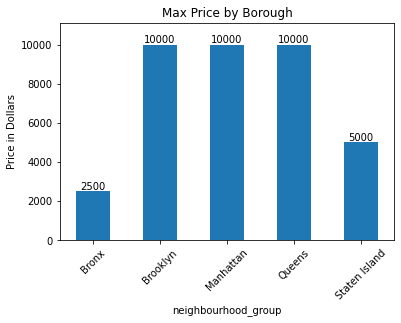

In [ ]:
ax = df3.groupby('neighbourhood_group').price.agg('max').plot.bar(ylim = [0,11100], 
                                                                  title = 'Max Price by Borough', 
                                                                  ylabel = 'Price in Dollars',
                                                                  rot = 45)

for container in ax.containers:
    ax.bar_label(container)



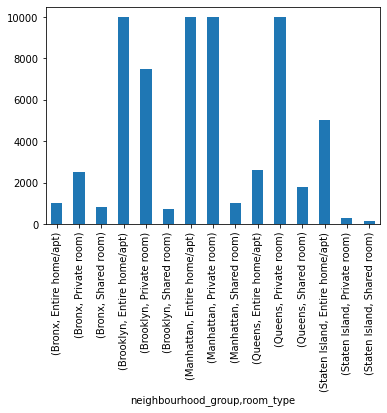

In [2]:


df3.groupby(['neighbourhood_group','room_type']).price.agg('max').plot.bar(y = 'room_type')



I had to do it with a pivot table to get around the double indexing of the groupby.

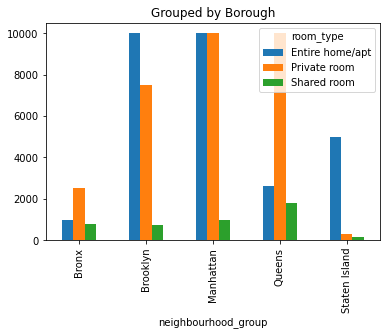

In [3]:
df_pivot = pa.pivot_table(
    df3, 
    values="price",
    index="neighbourhood_group",
    columns="room_type", 
    aggfunc=max
)

df_pivot.plot.bar(title = 'Grouped by Borough')

In [4]:
df_pivot

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,1000,2500,800
Brooklyn,10000,7500,725
Manhattan,10000,9999,1000
Queens,2600,10000,1800
Staten Island,5000,300,150


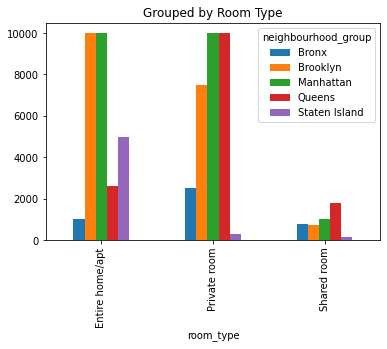

In [5]:
df_pivot = pa.pivot_table(
    df3, 
    values="price",
    index="room_type",
    columns="neighbourhood_group", 
    aggfunc=max
)

df_pivot.plot.bar(title = 'Grouped by Room Type')